Este projeto foi desenvolvido dada necessidade de achar um novo apartamento para eu alugar em Florianópolis.
Após algumas pesquisas eu constatei que a imobiliária IBAGY possuia um número imensamente maior de opções que as demais. 
Porém, após contato com a mesma, a atendente me falou que não poderia me enviar os novos imóveis e para eu ter conhecimentos dos mesmos deveria ficar olhando constantemente o site deles.
Foi ai que resolvi fazer um Scrapy para coletar os dados a cada 8h. Esse código esta no arquivo ibagy.py.
Como este projeto visa apenas incrementar meu portfolio, os dados são de algumas coletas feitas no mês de Abril de 2025.

Abaixo eu começo importando as bibliotecas utilizadas e importando os dados e armazenados em dataframe.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega os dados do arquivo JSON
df = pd.read_json("imoveis.json")
df.head()

,titulo,tipo,endereco,bairro,link,preco,quartos,vagas,area_total,imobiliaria
0,Garagem Centro,Garagem,"Avenida Hercilio Luz, 853, Centro - Florianópolis",Centro,https://ibagy.com.br/imovel/118587/garagem-and...,"R$ 290,00",,,,ibagy
1,Kitnet/Loft/Studio 1 Quarto Trindade 12m²,Kitnet/Loft/Studio,"Rua Professora Enoe Schutel, 179, Trindade - F...",Trindade,https://ibagy.com.br/imovel/81818/kitnet_loft_...,"R$ 968,57",1,,12,ibagy
2,Kitnet/Loft/Studio Ponte Do Imaruim 49m²,Kitnet/Loft/Studio,"Rua Nascente Do Sol, 287, Ponte Do Imaruim - P...",Ponte Do Imaruim,https://ibagy.com.br/imovel/127152/kitnet_loft...,"R$ 1.000,00",,,49,ibagy
3,Kitnet/Loft/Studio 1 Quarto Potecas 40m²,Kitnet/Loft/Studio,"Rua Rua João Sebastião Da Conceição Filho, 611...",Potecas,https://ibagy.com.br/imovel/127393/kitnet_loft...,"R$ 1.100,00",1,,40,ibagy
4,Kitnet/Loft/Studio 1 Quarto Trindade 20m²,Kitnet/Loft/Studio,"Rua Professora Maria Luiza Rodrigues, 136, Tri...",Trindade,https://ibagy.com.br/imovel/121129/kitnet_loft...,"R$ 1.140,49",1,,20,ibagy


In [7]:
# Verifica os dados e as colunas (ex: 'titulo', 'tipo', 'endereco', 'bairro', etc.)
print("Colunas disponíveis:", df.columns.tolist())
# Verifica o tamanho da df
df.shape

Colunas disponíveis: ['titulo', 'tipo', 'endereco', 'bairro', 'link', 'preco', 'quartos', 'vagas', 'area_total', 'imobiliaria']


(1011, 10)

In [8]:
#TRANSFORMAÇÕES DO DF
def convert_preco(preco_str):
    if isinstance(preco_str, str):
        # Remove "R$" e espaços, retira o separador de milhar e troca a vírgula por ponto.
        preco_str = preco_str.replace("R$", "").strip()
        preco_str = preco_str.replace(".", "").replace(",", ".")
        try:
            valor = float(preco_str)
            # Remove os centavos, convertendo para int, e depois retorna como float (3474.0 por exemplo)
            return float(int(valor))
        except Exception as e:
            print(f"Erro convertendo preço '{preco_str}': {e}")
            return None
    return preco_str

# Converte a coluna 'quartos' para numérico (inteiro)
df['quartos'] = pd.to_numeric(df['quartos'], errors='coerce')

# Converte 'area_total' para numérico (assumindo que ela venha apenas como número em m²)
df['area_total'] = pd.to_numeric(df['area_total'], errors='coerce')

# Converte 'preco' para float utilizando a função auxiliar
df['preco'] = df['preco'].apply(convert_preco)


Neste DF constam inúmeros imóveis que não são apartamento ou casa ou ainda são, mas com 1 quarto.
Como eu preciso de um apto com 2 ou mais quartos, vou criar um novo df com esse filtro

In [9]:
# Cria um novo DataFrame apenas com imóveis que tenham 2 ou mais quartos
df_2plus = df[df['quartos'] >= 2].copy()

In [10]:
df_2plus.head()

,titulo,tipo,endereco,bairro,link,preco,quartos,vagas,area_total,imobiliaria
12,Apartamento 2 Quartos Nova Palhoça 50m²,Apartamento,"Rua Joao Olimpio De Espindola, 00, Nova Palhoç...",Nova Palhoça,https://ibagy.com.br/imovel/128190/apartamento...,1300.0,2.0,1,50.0,ibagy
15,Apartamento 2 Quartos Ponte Do Imaruim 50m²,Apartamento,"Rua Jose Silveira De Souza, 762, Ponte Do Imar...",Ponte Do Imaruim,https://ibagy.com.br/imovel/110723/apartamento...,1473.0,2.0,,50.0,ibagy
16,Apartamento 2 Quartos Praia João Rosa 42m²,Apartamento,"Servidão João Maria Rosa, 490, Praia João Rosa...",Praia João Rosa,https://ibagy.com.br/imovel/126980/apartamento...,1495.0,2.0,1,42.0,ibagy
17,Apartamento 2 Quartos Pachecos 44m²,Apartamento,"Rua Joao Martins De Souza, 480, Pachecos - Pal...",Pachecos,https://ibagy.com.br/imovel/126633/apartamento...,1509.0,2.0,,44.0,ibagy
18,Apartamento 2 Quartos Bom Viver 39m²,Apartamento,"Rua Amaro Damasio, 210, Bom Viver - Biguaçu",Bom Viver,https://ibagy.com.br/imovel/127987/apartamento...,1539.0,2.0,,39.0,ibagy


In [11]:
df_2plus.shape

(812, 10)

Ok. Agora tenho o df filtrado de acordo com o meu interesse. Cerca de 200 registros ficaram de fora.

Apenas para conhecimento, vou filtrar a quantidade de imóveis por bairro.

In [16]:
# Agrupa os imóveis por bairro e conta quantos apartamentos há em cada grupo
bairro_counts = df_2plus.groupby("bairro").size().sort_values(ascending=False)

# Exibe os números (para conferência)
print(bairro_counts)

bairro
Centro                      82
Ingleses Do Rio Vermelho    46
Campeche                    45
Pedra Branca                37
Barreiros                   35
                            ..
Santo Antônio                1
São Joao Do Rio Vermelho     1
Sertao Do Maruim             1
Tapera                       1
Vargem Do Bom Jesus          1
Length: 115, dtype: int64


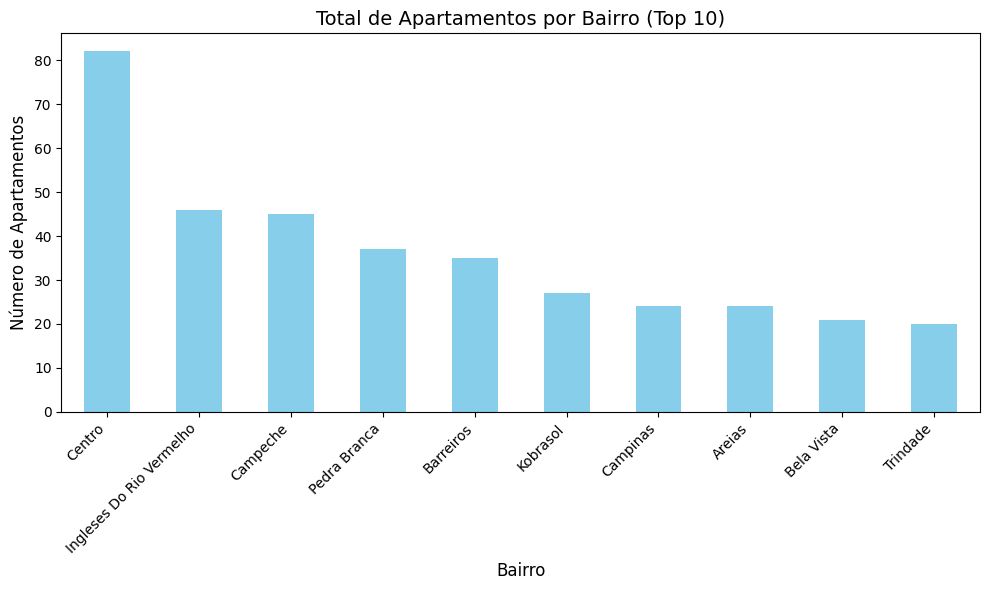

In [17]:
# Filtra os 10 bairros com mais registros
top_10_bairros = bairro_counts.nlargest(10)

# Cria um gráfico de barras com o total de apartamentos por bairro
plt.figure(figsize=(10, 6))
top_10_bairros.plot(kind="bar", color="skyblue")

plt.xlabel("Bairro", fontsize=12)
plt.ylabel("Número de Apartamentos", fontsize=12)
plt.title("Total de Apartamentos por Bairro (Top 10)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Exibe o gráfico
plt.show()

No gráfico acima pude ver que constam bairros dos munícipios de São José e Palhoça.

In [18]:
# Cria uma nova coluna com o valor do m²: preço dividido pela área total
df_2plus['m2_price'] = df_2plus['preco'] / df_2plus['area_total']

# Calcula a média do valor do m² dos imóveis com 2 quartos
avg_m2_2 = df_2plus[df_2plus['quartos'] == 2]['m2_price'].mean()

# Calcula a média do valor do m² dos imóveis com 3 quartos
avg_m2_3 = df_2plus[df_2plus['quartos'] == 3]['m2_price'].mean()

print("Média do valor por m² dos imóveis com 2 quartos:", avg_m2_2)
print("Média do valor por m² dos imóveis com 3 quartos:", avg_m2_3)

Média do valor por m² dos imóveis com 2 quartos: 51.41843951639596
Média do valor por m² dos imóveis com 3 quartos: 53.146063356112094


Acima eu consegui ver a média dos preços dos imóveis com 2 e 3 quartos de todos os bairros, porém me interessa mesmo saber a média somente dos bairros que estava interessado.

In [20]:
# Filtra somente os imóveis dos bairros desejados
# Usamos lower-case para garantir correspondência
df_2plus['bairro_lower'] = df_2plus['bairro'].str.lower()
bairros_interese = [b.lower() for b in ["Trindade", "Kobrasol", "Capoeiras", "Campinas", "Jardim Atlântico", "Estreito"]]
df_2plus = df_2plus[df_2plus['bairro_lower'].isin(bairros_interese)]

# Cria a coluna com o valor do m²: preço dividido pela área_total
df_2plus['m2_price'] = df_2plus['preco'] / df_2plus['area_total']

# Calcula a média do valor do m² para imóveis com 2 quartos
media_m2_2 = df_2plus[df_2plus['quartos'] == 2]['m2_price'].mean()

# Calcula a média do valor do m² para imóveis com 3 quartos
media_m2_3 = df_2plus[df_2plus['quartos'] == 3]['m2_price'].mean()

print("Média do valor por m² para imóveis com 2 quartos nos bairros escolhidos:", media_m2_2)
print("Média do valor por m² para imóveis com 3 quartos nos bairros escolhidos:", media_m2_3)


Média do valor por m² para imóveis com 2 quartos nos bairros escolhidos: 53.50982866559713
Média do valor por m² para imóveis com 3 quartos nos bairros escolhidos: 55.01634556190231


Agora sim eu tenho o valor médio dos imóveis dos bairros desejados. A média subiu um pouco, normal, pois são bairros mais visados.


Em Florianópolis todos falam que morar na ilha é muito mais caro. Como meu interesse é na região continental eu não me preocupei com isso, mas por curiosidade vou comparar alguns bairros da região central da ilha com os bairros da região continental. 

In [42]:
# Filtra somente os imóveis dos bairros desejados
# Usamos lower-case para garantir correspondência
df_2plus['bairro_lower'] = df_2plus['bairro'].str.lower()
bairros_ilha = [b.lower() for b in ["João Paulo", "Agronômica", "Trindade", "Centro"]]
df_2plus = df_2plus[df_2plus['bairro_lower'].isin(bairros_ilha)]

# Cria a coluna com o valor do m²: preço dividido pela área_total
df_2plus['m2_price'] = df_2plus['preco'] / df_2plus['area_total']

# Calcula a média do valor do m² para imóveis com 2 quartos
media_m2_2 = df_2plus[df_2plus['quartos'] == 2]['m2_price'].mean()

# Calcula a média do valor do m² para imóveis com 3 quartos
media_m2_3 = df_2plus[df_2plus['quartos'] == 3]['m2_price'].mean()

print("Média do valor por m² para imóveis com 2 quartos no bairros da região central na ilha:", media_m2_2)
print("Média do valor por m² para imóveis com 3 quartos no bairros da região central na ilha:", media_m2_3)

Média do valor por m² para imóveis com 2 quartos no bairros da região central na ilha: 58.61643947010152
Média do valor por m² para imóveis com 3 quartos no bairros da região central na ilha: 52.29076855711835


De fato na ilha os imóveis tem uma média superior, mas a diferença ja deve ter sido maior, pois hoje em dia não existe uma disparidade de valores.

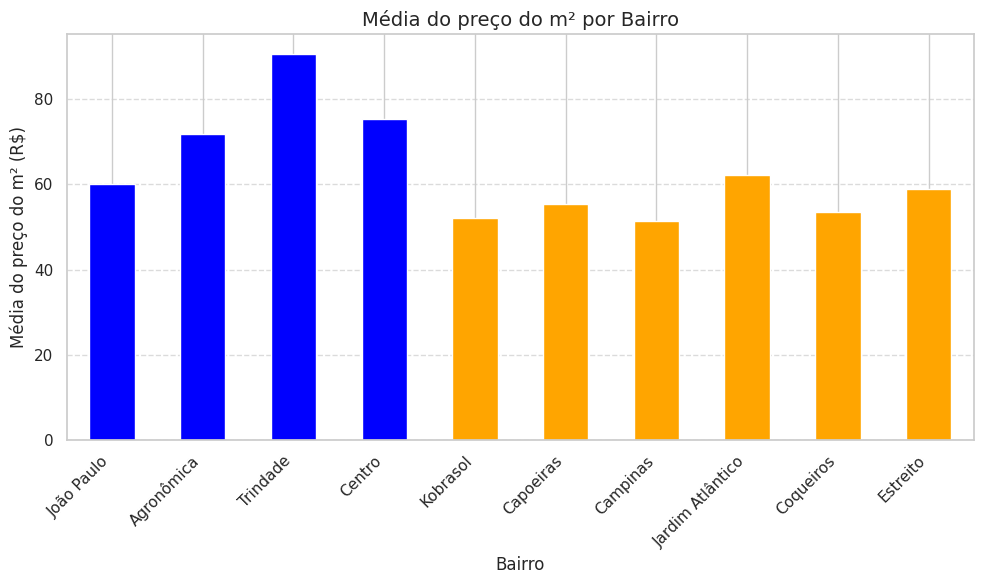

In [43]:
plt.figure(figsize=(10,6))
media_m2_por_bairro.plot(kind="bar", color=["blue"] * 4 + ["orange"] * (len(media_m2_por_bairro) - 4))
plt.xlabel("Bairro", fontsize=12)
plt.ylabel("Média do preço do m² (R$)", fontsize=12)
plt.title("Média do preço do m² por Bairro", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Para ficar mais fácil de ver essas médias, plotei as média em um gráfico de barras. Os bairros em azul são da região central e os demais são os bairros do meu interesse (bairros estes que ficam na região continental). O bairro Jardim Atlântico, que fica na região continental, já esta com a média acima do bairro João Paulo e o bairro Estreito muito próximo. Isso mostra que nem sempre morar no continente será mais barato.

# Bom, mas sera que a Ibagy tem o melhor valor do m2 em relação a outra imobiliárias?

Em certo momento me passou pela cabeça: Ok a Ibagy possui muito mais imóveis que as demais, mas sera que eles tem o melhor preço ou usam disso para cobrar mais?
Então eu resolvi coletar os dados de mais 2 imobiliárias: Dalton Andrade e Pirâmides.

In [26]:
import numpy as np

# Configura o estilo do Seaborn e tamanho de fonte
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Mapeamento dos arquivos com o nome da imobiliária correspondente
arquivos = {
    "imoveis.json": "ibagy",
    "imoveis_piramides.json": "piramides",
    "imoveis_dalton.json": "daltonandrade"
}

# Função para carregar cada JSON e adicionar a coluna "imobiliaria"
def carregar_dados(arquivo, nome_imob):
    df = pd.read_json(arquivo)
    if 'imobiliaria' not in df.columns:
        df['imobiliaria'] = nome_imob
    return df

# Carrega e concatena os DataFrames
dfs = [carregar_dados(arquivo, nome) for arquivo, nome in arquivos.items()]
df = pd.concat(dfs, ignore_index=True)

df.shape

(1182, 10)

Abaixo faço umas trasformações e deixo somente os registros dos bairros em comuns nas 3 imobiliárias.

In [27]:
# Função para converter o preço removendo os centavos.
# Exemplo: "R$ 3.957,00" → 3957.0; se a string estiver vazia, retorna np.nan
def convert_preco(preco_str):
    if isinstance(preco_str, str) and preco_str.strip():
        preco_str = preco_str.replace("R$", "").strip()
        # Remove separador de milhar e troca vírgula por ponto
        preco_str = preco_str.replace(".", "").replace(",", ".")
        try:
            valor = float(preco_str)
            return float(int(valor))  # descarta a parte decimal
        except Exception as e:
            print(f"Erro convertendo preço '{preco_str}': {e}")
            return np.nan
    return np.nan

# Converte preços, área e quartos
df['preco'] = df['preco'].apply(convert_preco)
df['area_total'] = pd.to_numeric(df['area_total'], errors='coerce')
df['quartos'] = pd.to_numeric(df['quartos'], errors='coerce')

# Calcula o preço por metro quadrado
df['m2_price'] = df['preco'] / df['area_total']

# --- Preenchendo o bairro, se estiver vazio ---
# Se o campo "bairro" estiver vazio (ou for string vazia), tenta extrair a partir de "endereco".
def preencher_bairro(row):
    bairro = str(row.get("bairro", "")).strip()
    if not bairro:
        endereco = str(row.get("endereco", "")).strip()
        # Caso o endereço contenha " - ", vamos usar a parte anterior
        if " - " in endereco:
            return endereco.split(" - ")[0].strip()
        # Caso contenha vírgula, tenta o mesmo a partir da terceira parte (padrão "Rua X, Número, Bairro - ...")
        partes = endereco.split(',')
        if len(partes) >= 3:
            sub = partes[2].strip()
            return sub.split(" - ")[0].strip()
        return endereco
    return bairro

df["bairro"] = df.apply(preencher_bairro, axis=1)

# Para facilitar comparações, cria uma coluna com o bairro em minúsculas
df['bairro_lower'] = df['bairro'].str.lower()

# --- Filtragem dos dados ---
# Filtra para manter somente imóveis com 2 ou 3 quartos e com área e preço válidos
df = df[(df['quartos'].isin([2,3])) & (df['area_total'].notnull()) & (df['preco'].notnull())].copy()

# Agora, para selecionar somente os bairros que aparecem em todas as imobiliárias,
# obtemos os bairros únicos de cada imobiliária (convertidos para minúsculas)
bairros_ibagy     = set(df[df['imobiliaria'] == "ibagy"]['bairro_lower'].dropna().unique())
bairros_piramides = set(df[df['imobiliaria'] == "piramides"]['bairro_lower'].dropna().unique())
bairros_dalton    = set(df[df['imobiliaria'] == "daltonandrade"]['bairro_lower'].dropna().unique())

bairros_comuns = bairros_ibagy.intersection(bairros_piramides).intersection(bairros_dalton)
print("Bairros comuns nas 3 imobiliárias:", bairros_comuns)

# Se não houver nenhum bairro comum, os dados para os gráficos serão vazios
df = df[df['bairro_lower'].isin(bairros_comuns)].copy()

# Cria uma coluna para o bairro padronizado (vamos usar a capitalização presente na coluna original "bairro")
df['bairro_padronizado'] = df['bairro'].str.strip()


Bairros comuns nas 3 imobiliárias: {'joão paulo', 'trindade', 'córrego grande', 'agronômica', 'centro'}


In [46]:
# Contagem de imóveis por imobiliária e bairro
contagem_por_bairro = df.groupby(['imobiliaria', 'bairro_padronizado']).size().reset_index(name='quantidade')
print("Contagem de imóveis por imobiliária e bairro:")
print(contagem_por_bairro)

# Contagem de imóveis por imobiliária, bairro e número de quartos (2 e 3)
contagem_por_bairro_quartos = df[df['quartos'].isin([2, 3])].groupby(['imobiliaria', 'bairro_padronizado', 'quartos']).size().reset_index(name='quantidade')
print("\nContagem de imóveis por imobiliária, bairro e número de quartos:")
print(contagem_por_bairro_quartos)

Contagem de imóveis por imobiliária e bairro:
      imobiliaria bairro_padronizado  quantidade
0   daltonandrade             Centro           8
1   daltonandrade     Córrego Grande           1
2   daltonandrade         João Paulo           1
3   daltonandrade           Trindade           4
4           ibagy         Agronômica          10
5           ibagy             Centro          66
6           ibagy     Córrego Grande          11
7           ibagy         João Paulo           4
8           ibagy           Trindade          19
9       piramides         Agronômica           3
10      piramides             Centro          18
11      piramides     Córrego Grande           1
12      piramides         João Paulo           1
13      piramides           Trindade           2

Contagem de imóveis por imobiliária, bairro e número de quartos:
      imobiliaria bairro_padronizado  quartos  quantidade
0   daltonandrade             Centro      2.0           2
1   daltonandrade             Centro 

In [25]:
df.shape

(182, 13)

Agora sei os bairros comuns e o tamanho do dataframe. Mas fica muito mais fácil para ver esses, junto com as respectivas médias, em um gráfico.

Média do preço do m² (dados agrupados):
  bairro_padronizado quartos  m2_price_mean
0         Agronômica     2.0      69.003808
1             Centro     2.0      82.751569
2     Córrego Grande     2.0      86.460363
3         João Paulo     2.0      60.341062
4           Trindade     2.0      60.066699
5         Agronômica     3.0     103.342910
6             Centro     3.0      67.019729
7     Córrego Grande     3.0      63.317091
8         João Paulo     3.0      75.412169
9           Trindade     3.0      54.860161


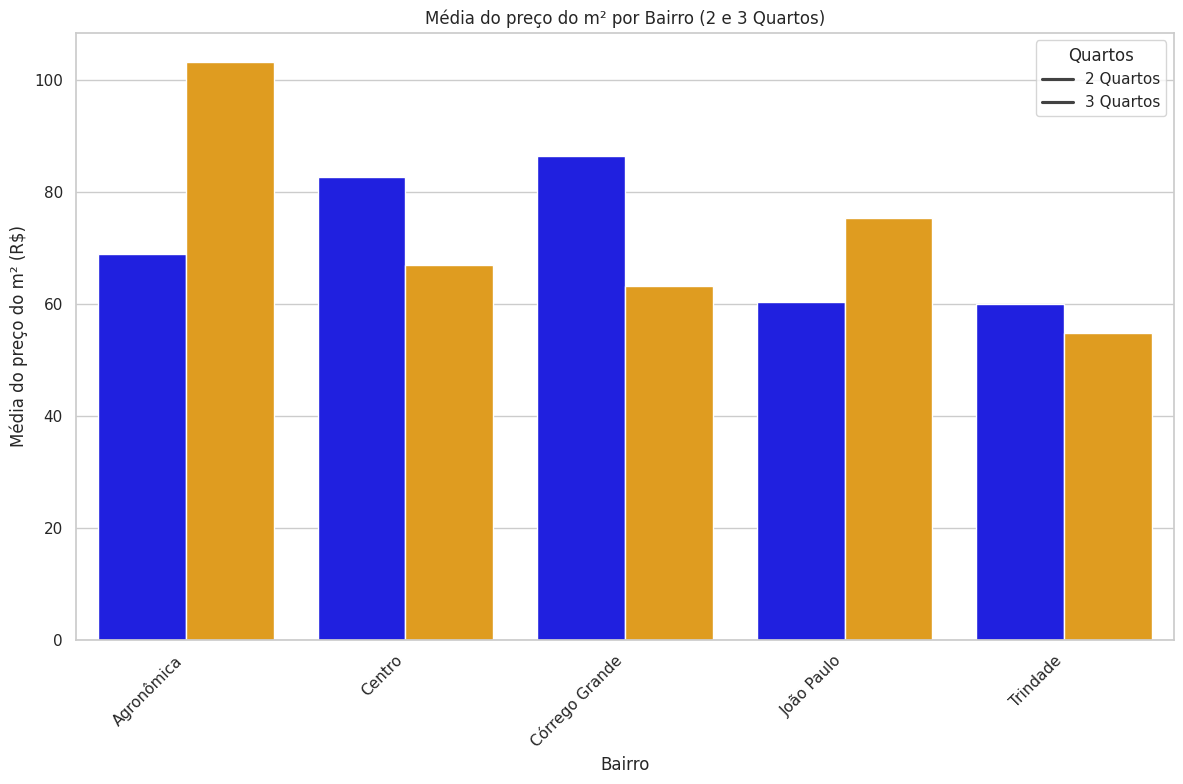

In [28]:
# --- Gráficos ---
# Gráfico 1: Gráfico de Barras com a média do preço/m² por bairro para imóveis com 2 e 3 quartos
# Agrupa por bairro e número de quartos e calcula a média
grouped = df.groupby(["bairro_padronizado", "quartos"])["m2_price"].mean().unstack(fill_value=0)

# Converte para formato "long" para o Seaborn
grouped_long = grouped.reset_index().melt(id_vars="bairro_padronizado", value_vars=[2, 3],
                                          var_name="quartos", value_name="m2_price_mean")
print("Média do preço do m² (dados agrupados):")
print(grouped_long)

plt.figure(figsize=(12,8))
sns.barplot(data=grouped_long, x="bairro_padronizado", y="m2_price_mean",
            hue="quartos", palette=["blue", "orange"])
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro (2 e 3 Quartos)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Quartos", labels=["2 Quartos", "3 Quartos"])
plt.tight_layout()
plt.show()

/tmp/ipykernel_2065594/1761280560.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g1 = sns.catplot(data=grouped_imob, kind="bar", x="bairro_padronizado", y="m2_price",
/tmp/ipykernel_2065594/1761280560.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_2065594/1761280560.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_2065594/1761280560.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


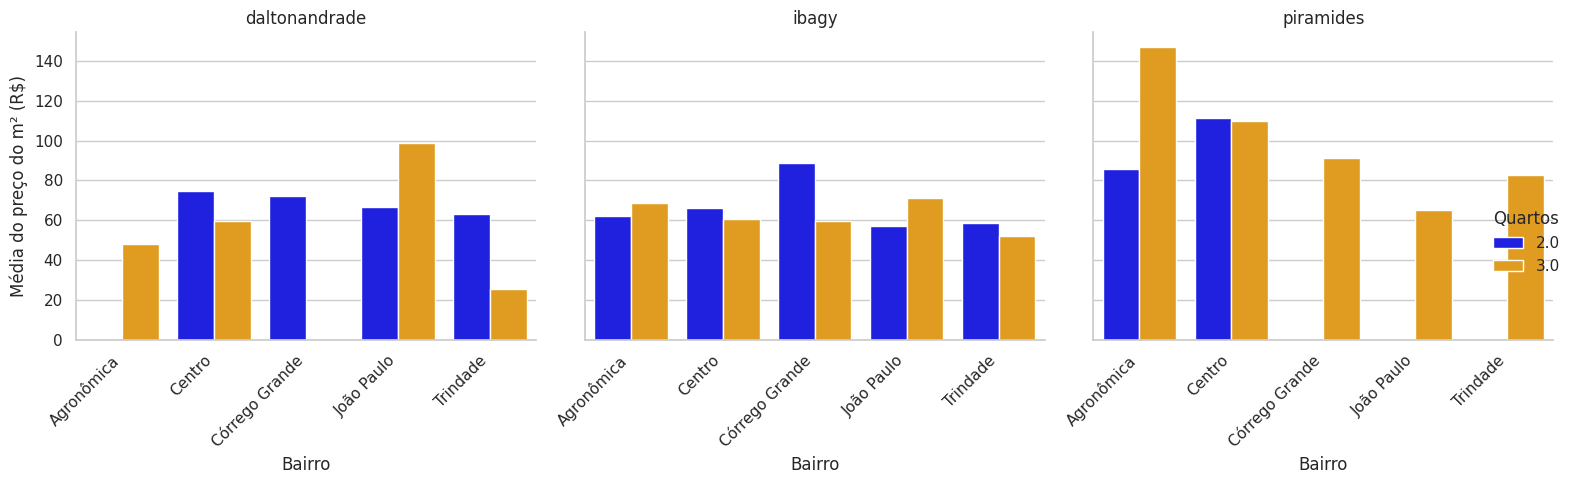

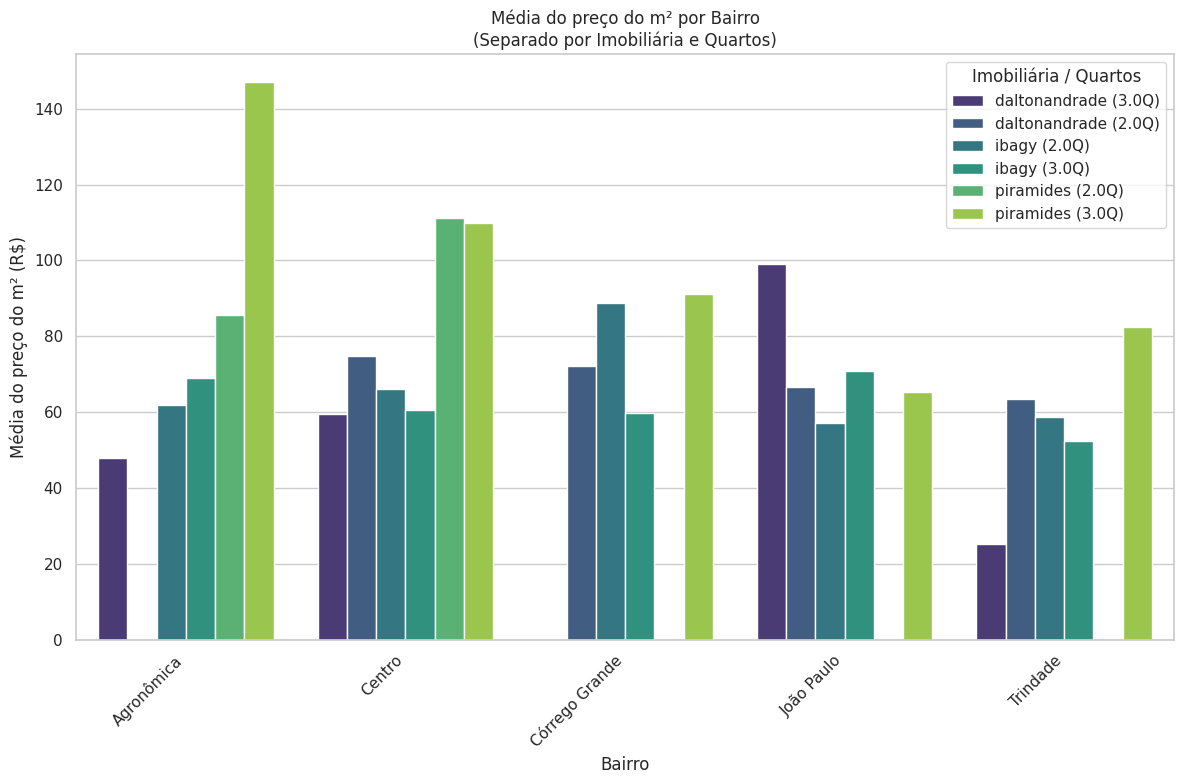

In [30]:
df["bairro"] = df.apply(preencher_bairro, axis=1)
df['bairro_lower'] = df['bairro'].str.lower()

# --- Filtragem dos dados ---
# Mantém apenas imóveis com 2 ou 3 quartos, com área e preço válidos.
df = df[(df['quartos'].isin([2,3])) & (df['area_total'].notnull()) & (df['preco'].notnull())].copy()

# Considerando os bairros comuns às 3 imobiliárias são:
common_bairros = {"centro", "agronômica", "córrego grande", "trindade", "joão paulo"}

# Filtra os registros para que o bairro (em minúsculas) esteja entre os bairros comuns
df = df[df['bairro_lower'].isin(common_bairros)].copy()

# Cria coluna "bairro_padronizado" (mantendo a capitalização original, por exemplo, "Centro")
df['bairro_padronizado'] = df['bairro'].str.strip()

# --- Agrupamento para os Gráficos ---
# Agrupa por imobiliaria, bairro e número de quartos, calculando a média do m2_price
grouped_imob = df.groupby(['imobiliaria', 'bairro_padronizado', 'quartos'])['m2_price'].mean().reset_index()

##############################################
# GRÁFICO 1: Gráfico de Barras com Facet por Imobiliária
##############################################

# Gráfico de barras: para cada imobiliária (faceta), plota os bairros com médias de m2_price para 2 e 3 quartos.
g1 = sns.catplot(data=grouped_imob, kind="bar", x="bairro_padronizado", y="m2_price",
                 hue="quartos", col="imobiliaria", palette=["blue", "orange"],
                 ci=None, height=5, aspect=1)
g1.set_axis_labels("Bairro", "Média do preço do m² (R$)")
g1.set_titles("{col_name}")  # exibe o nome da imobiliária em cada coluna de facetas
g1._legend.set_title("Quartos")
for ax in g1.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

##############################################
# GRÁFICO 2: Gráfico de Barras Único com Separação por Imobiliária e Quartos
##############################################
# Cria uma nova coluna para combinar imobiliária e quartos, por exemplo, "ibagy (2Q)".
grouped_imob['imob_quartos'] = grouped_imob['imobiliaria'] + " (" + grouped_imob['quartos'].astype(str) + "Q)"

plt.figure(figsize=(12,8))
sns.barplot(data=grouped_imob, x="bairro_padronizado", y="m2_price",
            hue="imob_quartos", palette="viridis")
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro\n(Separado por Imobiliária e Quartos)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Imobiliária / Quartos")
plt.tight_layout()
plt.show()


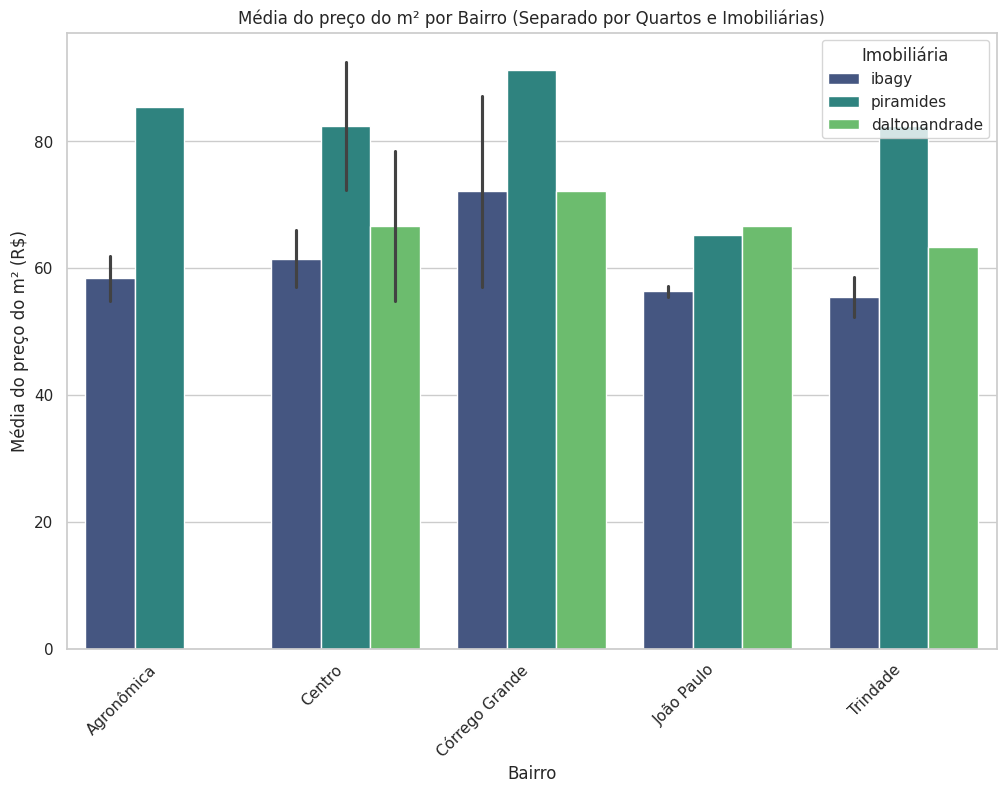

In [ ]:
# Ajusta o código para incluir médias separadas por quantidade de quartos e imobiliárias
grouped_complete = df.groupby(["bairro_padronizado", "quartos", "imobiliaria"])["m2_price"].mean().reset_index()

# Adiciona uma coluna para indicar o número de registros por grupo
grouped_complete["count"] = df.groupby(["bairro_padronizado", "quartos", "imobiliaria"])["m2_price"].transform("count").reset_index(drop=True)

# Plota o gráfico com todas as médias, separadas por quantidade de quartos e imobiliárias
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_complete, x="bairro_padronizado", y="m2_price", hue="imobiliaria", palette="viridis")
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro (Separado por Quartos e Imobiliárias)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Imobiliária")
plt.tight_layout()
plt.show()

Nos gráficos acima podemos ver as médias dos bairros em comum nas 3 imobiliárias. E para facilitar ainda mais o entendimento, no último gráfico coloquei os dados lado a lado, para ter uma ideia das médias da Ibagy em relação as demais.

Analisando esses gráficos, é fácil de ver que tem imóveis com uma disparidade de valor. Como eu busco imóveis dentro do meu orçamento, mas para não limitar tanto, eu vou separar apenas os imóveis abaixo de R$ 10 mil.

In [34]:
(df['preco'] < 10000).sum()

np.int64(149)

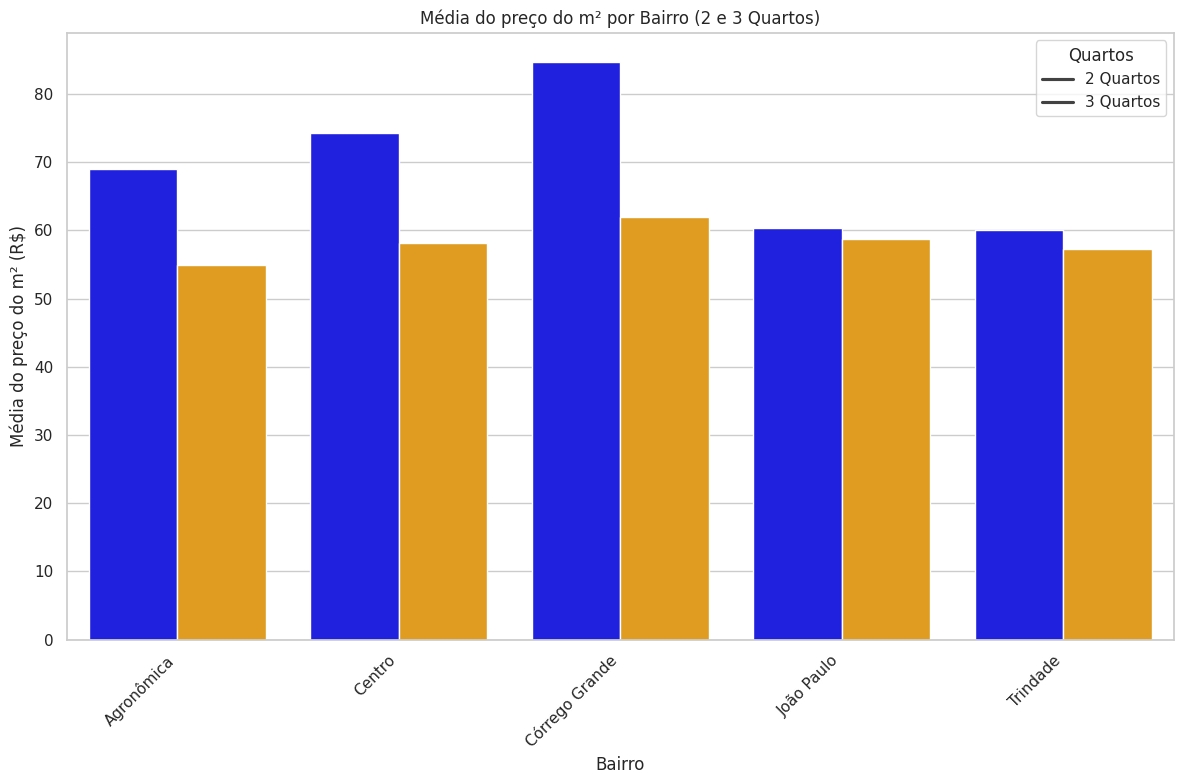

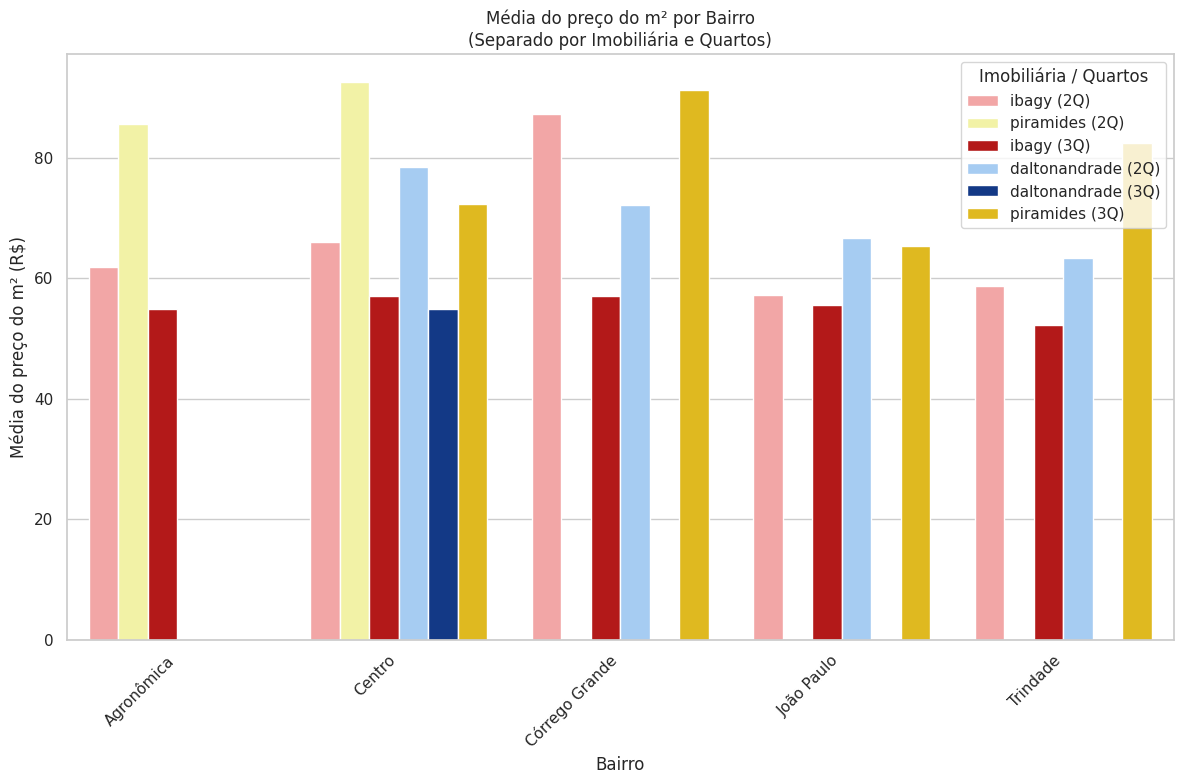

In [35]:
# --- Filtragem dos dados ---
# Filtra para manter somente imóveis com 2 ou 3 quartos, com área e preço válidos, e preço inferior a 10.000,00
df = df[(df['quartos'].isin([2, 3])) & 
        (df['area_total'].notnull()) & 
        (df['preco'].notnull()) &
        (df['preco'] < 10000)
       ].copy()

# Considera somente os bairros comuns nas 3 imobiliárias
common_bairros = {"centro", "agronômica", "córrego grande", "trindade", "joão paulo"}
df = df[df['bairro_lower'].isin(common_bairros)].copy()

# Cria uma coluna para o bairro padronizado (mantendo a capitalização original)
df['bairro_padronizado'] = df['bairro'].str.strip()

########################################
# GRÁFICO 1: Gráfico de Barras com Facetas (opcional)
########################################
grouped = df.groupby(["bairro_padronizado", "quartos"])["m2_price"].mean().unstack(fill_value=0)
grouped_long = grouped.reset_index().melt(id_vars="bairro_padronizado", value_vars=[2, 3],
                                          var_name="quartos", value_name="m2_price_mean")
plt.figure(figsize=(12,8))
sns.barplot(data=grouped_long, x="bairro_padronizado", y="m2_price_mean",
            hue="quartos", palette=["blue", "orange"])
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro (2 e 3 Quartos)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Quartos", labels=["2 Quartos", "3 Quartos"])
plt.tight_layout()
plt.show()

########################################
# GRÁFICO 2: Gráfico de Barras Único com Separação por Imobiliária e Quartos
########################################
# Agrupa por bairro, quartos e imobiliária para calcular a média do m2_price
grouped_imob = df.groupby(['bairro_padronizado', 'quartos', 'imobiliaria'])['m2_price'].mean().reset_index()

# Converte os valores de 'quartos' para inteiro antes de usá-los na coluna combinada
grouped_imob['imob_quartos'] = grouped_imob['imobiliaria'] + " (" + grouped_imob['quartos'].astype(int).astype(str) + "Q)"

# Define o palette personalizado com dois tons para cada imobiliária:
custom_palette = {
    "ibagy (2Q)"         : "#ff9999",  # vermelho claro
    "ibagy (3Q)"         : "#cc0000",  # vermelho escuro
    "daltonandrade (2Q)" : "#99ccff",  # azul claro
    "daltonandrade (3Q)" : "#003399",  # azul escuro
    "piramides (2Q)"     : "#ffff99",  # amarelo claro
    "piramides (3Q)"     : "#ffcc00"   # amarelo escuro
}

plt.figure(figsize=(12,8))
sns.barplot(data=grouped_imob, x="bairro_padronizado", y="m2_price",
            hue="imob_quartos", palette=custom_palette)
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro\n(Separado por Imobiliária e Quartos)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Imobiliária / Quartos")
plt.tight_layout()
plt.show()


Agora eu consigo ter uma ideia dos imóveis dentro de um range de valor. Mas ainda achei confuso para responder minha dúvida sobre os valores da Ibagy. Então vou separar o gráfico em 2, sendo um deles somente com os imóveis de 2 quartos e outro com os imóveis de 3 quartos.

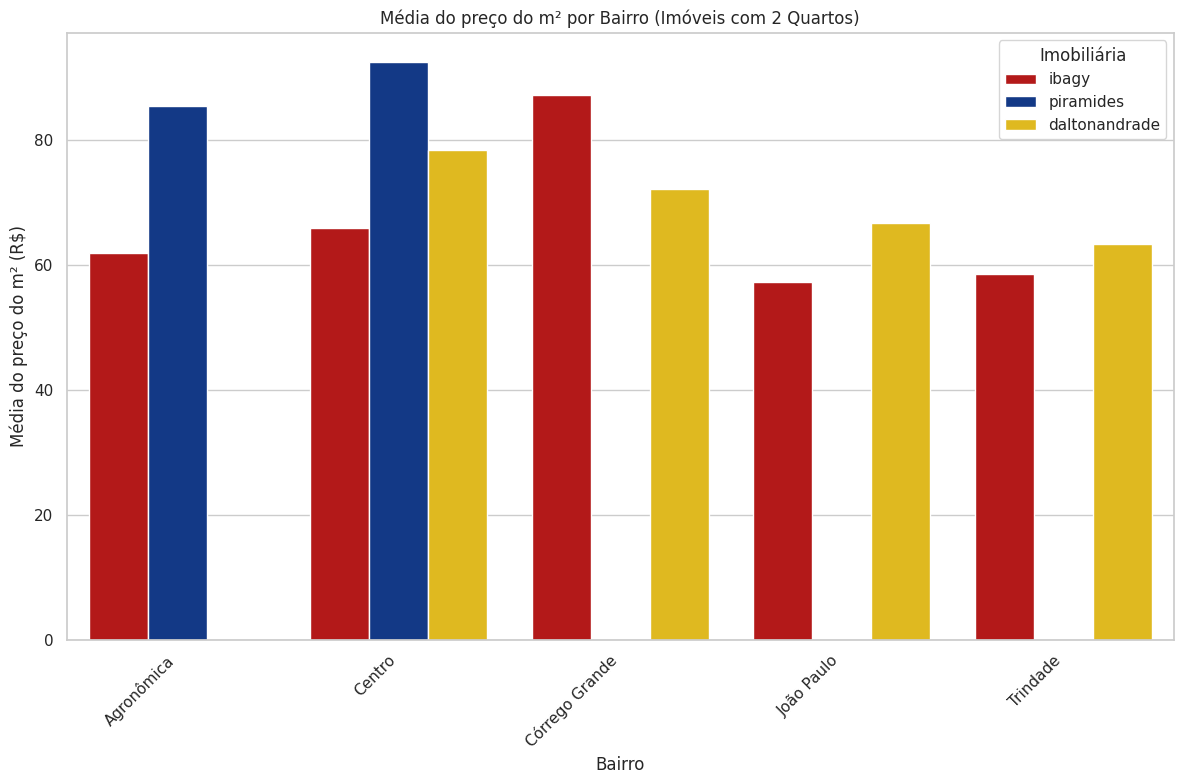

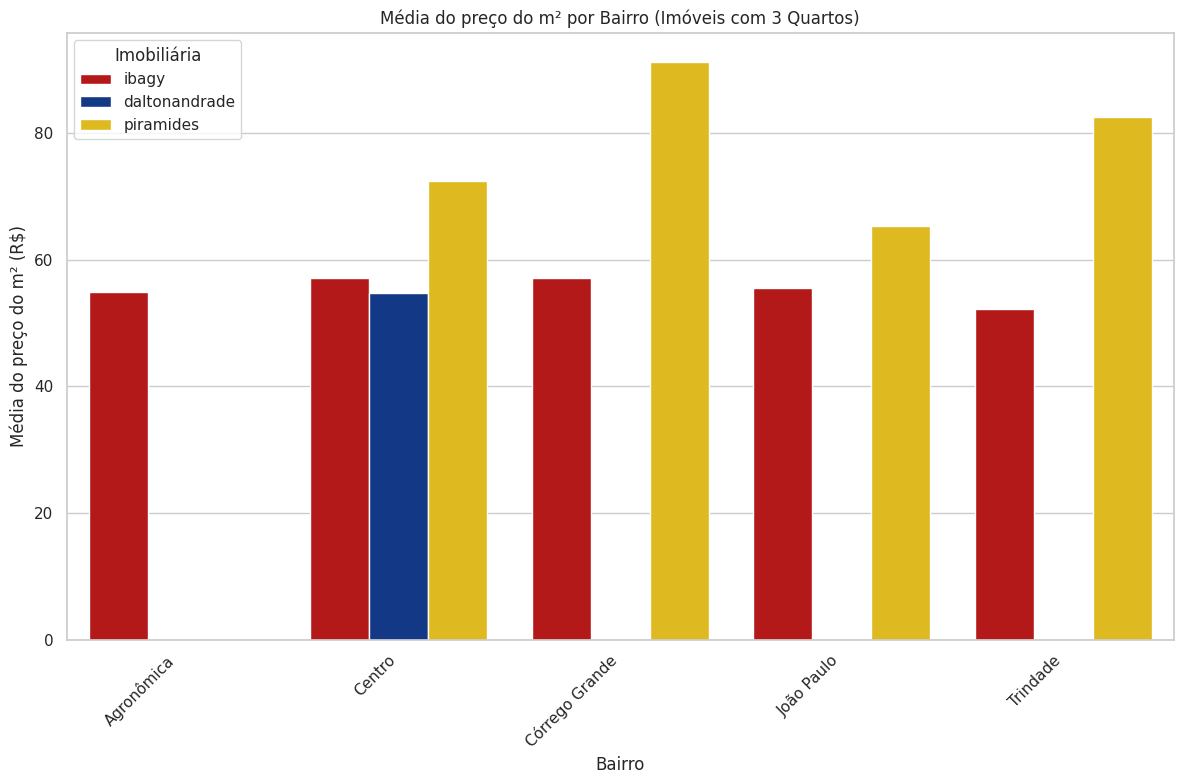

In [38]:
# Filtra os dados para imóveis com 2 quartos
grouped_2Q = grouped_imob[grouped_imob['quartos'] == 2]

plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_2Q, x="bairro_padronizado", y="m2_price",
            hue="imobiliaria", palette=["#cc0000", "#003399", "#ffcc00"])
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro (Imóveis com 2 Quartos)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Imobiliária")
plt.tight_layout()
plt.show()

# Filtra os dados para imóveis com 3 quartos
grouped_3Q = grouped_imob[grouped_imob['quartos'] == 3]

plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_3Q, x="bairro_padronizado", y="m2_price",
            hue="imobiliaria", palette=["#cc0000", "#003399", "#ffcc00"])
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro (Imóveis com 3 Quartos)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Imobiliária")
plt.tight_layout()
plt.show()

In [45]:
# Calcula a média geral do preço por m² para cada imobiliária, separando por número de quartos (2 e 3)
media_por_imobiliaria = df.groupby(['imobiliaria', 'quartos'])['m2_price'].mean().reset_index()

# Filtra os resultados para exibir separadamente as médias para 2 e 3 quartos
media_2_quartos = media_por_imobiliaria[media_por_imobiliaria['quartos'] == 2]
media_3_quartos = media_por_imobiliaria[media_por_imobiliaria['quartos'] == 3]

print("Média geral do preço por m² para apartamentos de 2 quartos por imobiliária:")
print(media_2_quartos)

print("\nMédia geral do preço por m² para apartamentos de 3 quartos por imobiliária:")
print(media_3_quartos)

Média geral do preço por m² para apartamentos de 2 quartos por imobiliária:
     imobiliaria  quartos   m2_price
0  daltonandrade      2.0  68.624848
2          ibagy      2.0  65.869772
4      piramides      2.0  91.304041

Média geral do preço por m² para apartamentos de 3 quartos por imobiliária:
     imobiliaria  quartos   m2_price
1  daltonandrade      3.0  54.820113
3          ibagy      3.0  56.040088
5      piramides      3.0  76.383531


Agora posso ficar tranquilo que a Ibagy não cobra a mais por ser mais influente que as demais.

Estatísticas por grupo (bairro e quartos):
  bairro_padronizado  quartos   n       mean        std   ic_lower    ic_upper
0         Agronômica      2.0  10  69.003808  24.417452  51.536615   86.471001
1         Agronômica      3.0   3  54.878421  20.272837   4.517902  105.238939
2             Centro      2.0  48  74.245047  26.011998  66.691951   81.798144
3             Centro      3.0  44  58.169196  17.062562  52.981703   63.356689
4     Córrego Grande      2.0   6  84.719048  17.712170  66.131265  103.306830
5     Córrego Grande      3.0   7  61.983247  15.097844  48.020071   75.946424
6         João Paulo      2.0   3  60.341062   9.912240  35.717693   84.964430
7         João Paulo      3.0   3  58.780474  10.027190  33.871553   83.689394
8           Trindade      2.0  13  60.066699  13.237513  52.067350   68.066049
9           Trindade      3.0  12  57.324143  19.701514  44.806398   69.841888


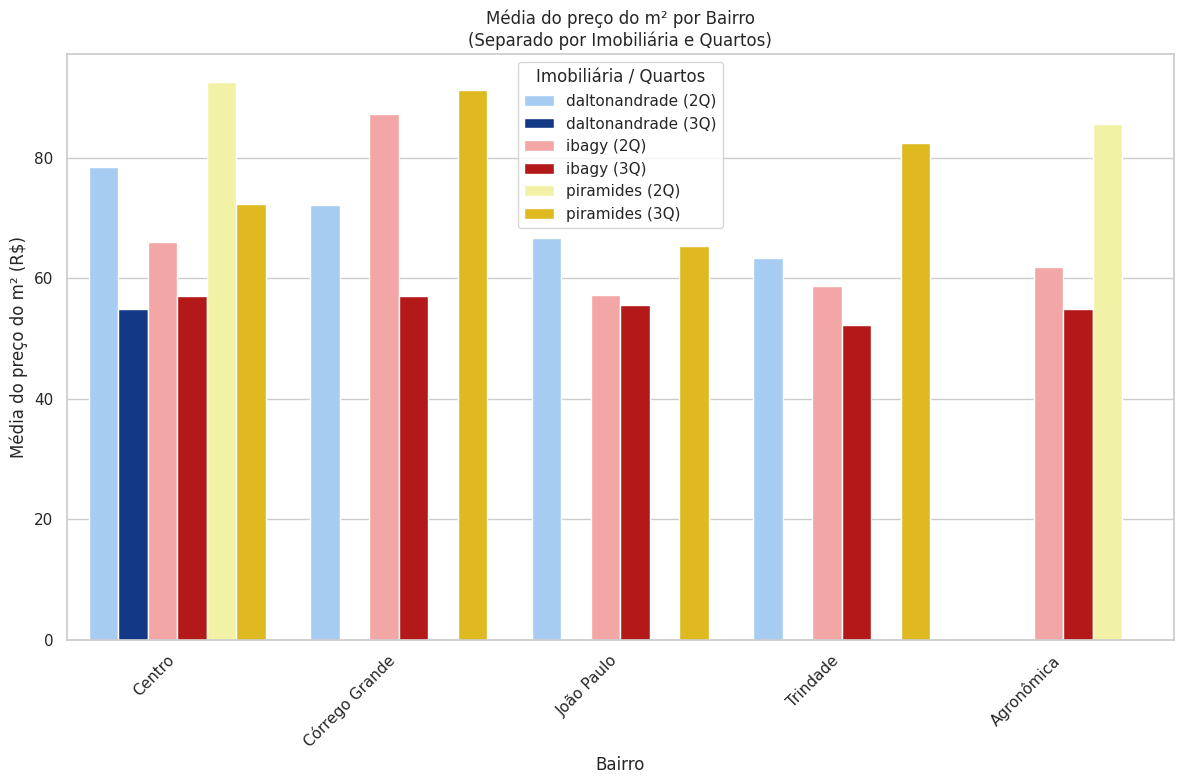

In [60]:
# %% [code]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuração dos gráficos do Seaborn
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Mapeamento dos arquivos com o nome da imobiliária correspondente
arquivos = {
    "imoveis.json": "ibagy",
    "imoveis_piramides.json": "piramides",
    "imoveis_dalton.json": "daltonandrade"
}

# Função para carregar cada JSON e adicionar a coluna "imobiliaria"
def carregar_dados(arquivo, nome_imob):
    df = pd.read_json(arquivo)
    if 'imobiliaria' not in df.columns:
        df['imobiliaria'] = nome_imob
    return df

# Carrega e concatena os DataFrames
dfs = [carregar_dados(arquivo, nome) for arquivo, nome in arquivos.items()]
df = pd.concat(dfs, ignore_index=True)

# Função para converter o preço removendo os centavos.
def convert_preco(preco_str):
    if isinstance(preco_str, str) and preco_str.strip():
        preco_str = preco_str.replace("R$", "").strip()
        preco_str = preco_str.replace(".", "").replace(",", ".")
        try:
            valor = float(preco_str)
            return float(int(valor))  # descarta centavos
        except Exception as e:
            print(f"Erro convertendo preço '{preco_str}': {e}")
            return np.nan
    return np.nan

# Converte os campos necessários
df['preco'] = df['preco'].apply(convert_preco)
df['area_total'] = pd.to_numeric(df['area_total'], errors='coerce')
df['quartos'] = pd.to_numeric(df['quartos'], errors='coerce')

# Calcula o preço por metro quadrado
df['m2_price'] = df['preco'] / df['area_total']

# Preenche o campo "bairro" se estiver vazio, extraindo do "endereco"
def preencher_bairro(row):
    bairro = str(row.get("bairro", "")).strip()
    if not bairro:
        endereco = str(row.get("endereco", "")).strip()
        if " - " in endereco:
            return endereco.split(" - ")[0].strip()
        partes = endereco.split(',')
        if len(partes) >= 3:
            sub = partes[2].strip()
            return sub.split(" - ")[0].strip()
        return endereco
    return bairro

df["bairro"] = df.apply(preencher_bairro, axis=1)
df['bairro_lower'] = df['bairro'].str.lower()

# Filtra para manter somente imóveis com 2 ou 3 quartos, dados válidos e preço abaixo de 10.000
df = df[(df['quartos'].isin([2,3])) & 
        (df['area_total'].notnull()) & 
        (df['preco'].notnull()) &
        (df['preco'] < 10000)
       ].copy()

# Os bairros comuns nas três imobiliárias são conhecidos:
common_bairros = {"centro", "agronômica", "córrego grande", "trindade", "joão paulo"}
df = df[df['bairro_lower'].isin(common_bairros)].copy()
df['bairro_padronizado'] = df['bairro'].str.strip()

# %% [code] -- Cálculo dos intervalos de confiança para a média
# Função para calcular o intervalo de confiança de 95% para a média
def ic_media(data):
    n = len(data)
    if n == 0:
        return (np.nan, np.nan)
    mean = np.mean(data)
    sem = stats.sem(data)  # erro padrão da média
    h = sem * stats.t.ppf((1 + 0.95) / 2., n-1)
    return (mean - h, mean + h)

# Criar um DataFrame com estatísticas por grupo (bairro, quartos)
stats_df = df.groupby(["bairro_padronizado", "quartos"])["m2_price"].agg(
    n = "count",
    mean = "mean",
    std = "std"
).reset_index()

# Calcula os intervalos de confiança
stats_df["ic_lower"], stats_df["ic_upper"] = zip(*stats_df.apply(lambda row: ic_media(df[(df["bairro_padronizado"]==row["bairro_padronizado"]) & (df["quartos"]==row["quartos"])]["m2_price"]), axis=1))

print("Estatísticas por grupo (bairro e quartos):")
print(stats_df)

# %% [code] -- GRÁFICO 1: Gráfico de Barras com Facetas por Imobiliária
grouped_imob = df.groupby(['imobiliaria', 'bairro_padronizado', 'quartos'])['m2_price'].mean().reset_index()

# Para a separação de cores para cada combinação (2Q e 3Q) em cada imobiliária, definimos um palette
custom_palette = {
    "ibagy (2Q)"         : "#ff9999",  # vermelho claro
    "ibagy (3Q)"         : "#cc0000",  # vermelho escuro
    "daltonandrade (2Q)" : "#99ccff",  # azul claro
    "daltonandrade (3Q)" : "#003399",  # azul escuro
    "piramides (2Q)"     : "#ffff99",  # amarelo claro
    "piramides (3Q)"     : "#ffcc00"   # amarelo escuro
}

grouped_imob["imob_quartos"] = grouped_imob["imobiliaria"] + " (" + grouped_imob["quartos"].astype(int).astype(str) + "Q)"

plt.figure(figsize=(12,8))
sns.barplot(data=grouped_imob, x="bairro_padronizado", y="m2_price",
            hue="imob_quartos", palette=custom_palette)
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro\n(Separado por Imobiliária e Quartos)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Imobiliária / Quartos")
plt.tight_layout()
plt.show()

In [57]:
from scipy import stats
# Suponha que queremos o intervalo de confiança para a média do preço do m² em "centro" para imóveis com 2 quartos:
grupo = df[(df["bairro_lower"]=="centro") & (df["quartos"]==2)]["m2_price"].dropna()
n = grupo.count()
mean = grupo.mean()
std_err = stats.sem(grupo)
 
# Calcula o intervalo de confiança de 95%
h = std_err * stats.t.ppf((1 + 0.95) / 2., n - 1)
ic_lower, ic_upper = mean - h, mean + h

print(f"Para imóveis com 2 quartos em Centro:")
print(f"Média: {mean:.2f}, IC 95%: ({ic_lower:.2f}, {ic_upper:.2f})")
# Com esses exemplos você pode entender que a inferência estatística permite usar uma amostra para estimar parâmetros da população e testar hipóteses sobre esses parâmetros.


Para imóveis com 2 quartos em Centro:
Média: 74.25, IC 95%: (66.69, 81.80)


E para contar o final dessa história. Depois de alguns dias, onde eu sempre recebia as novidades via e-mail, eu acabei recebendo um email onde constava um apartamento de 3 quartos por R$ 2800 que me chamou a atenção. Eu mais ou menos tinha uma ideia que esse valor estava abaixo dos demais no mercados então voltei aqui para verificar. Vou utilizar os mesmos dados ja coletados para ter apenas uma ideia.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega os dados do arquivo JSON
df = pd.read_json("imoveis.json")
df.head()

,titulo,tipo,endereco,bairro,link,preco,quartos,vagas,area_total,imobiliaria
0,Garagem Centro,Garagem,"Avenida Hercilio Luz, 853, Centro - Florianópolis",Centro,https://ibagy.com.br/imovel/118587/garagem-and...,"R$ 290,00",,,,ibagy
1,Kitnet/Loft/Studio 1 Quarto Trindade 12m²,Kitnet/Loft/Studio,"Rua Professora Enoe Schutel, 179, Trindade - F...",Trindade,https://ibagy.com.br/imovel/81818/kitnet_loft_...,"R$ 968,57",1,,12,ibagy
2,Kitnet/Loft/Studio Ponte Do Imaruim 49m²,Kitnet/Loft/Studio,"Rua Nascente Do Sol, 287, Ponte Do Imaruim - P...",Ponte Do Imaruim,https://ibagy.com.br/imovel/127152/kitnet_loft...,"R$ 1.000,00",,,49,ibagy
3,Kitnet/Loft/Studio 1 Quarto Potecas 40m²,Kitnet/Loft/Studio,"Rua Rua João Sebastião Da Conceição Filho, 611...",Potecas,https://ibagy.com.br/imovel/127393/kitnet_loft...,"R$ 1.100,00",1,,40,ibagy
4,Kitnet/Loft/Studio 1 Quarto Trindade 20m²,Kitnet/Loft/Studio,"Rua Professora Maria Luiza Rodrigues, 136, Tri...",Trindade,https://ibagy.com.br/imovel/121129/kitnet_loft...,"R$ 1.140,49",1,,20,ibagy


In [62]:
#TRANSFORMAÇÕES DO DF
def convert_preco(preco_str):
    if isinstance(preco_str, str):
        # Remove "R$" e espaços, retira o separador de milhar e troca a vírgula por ponto.
        preco_str = preco_str.replace("R$", "").strip()
        preco_str = preco_str.replace(".", "").replace(",", ".")
        try:
            valor = float(preco_str)
            # Remove os centavos, convertendo para int, e depois retorna como float (3474.0 por exemplo)
            return float(int(valor))
        except Exception as e:
            print(f"Erro convertendo preço '{preco_str}': {e}")
            return None
    return preco_str

# Converte a coluna 'quartos' para numérico (inteiro)
df['quartos'] = pd.to_numeric(df['quartos'], errors='coerce')

# Converte 'area_total' para numérico (assumindo que ela venha apenas como número em m²)
df['area_total'] = pd.to_numeric(df['area_total'], errors='coerce')

# Converte 'preco' para float utilizando a função auxiliar
df['preco'] = df['preco'].apply(convert_preco)


In [72]:
# Filtra o DataFrame para incluir apenas registros do bairro "Estreito"
df_estreito = df[df['bairro'] == 'Estreito'][df['quartos'] == 3].copy()

# Exibe os primeiros registros para conferência
df_estreito.head()

/tmp/ipykernel_2065594/2163205775.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_estreito = df[df['bairro'] == 'Estreito'][df['quartos'] == 3].copy()


,titulo,tipo,endereco,bairro,link,preco,quartos,vagas,area_total,imobiliaria
361,Apartamento 3 Quartos Estreito 72m²,Apartamento,"Rua Visconde De Cairú, 241, Estreito - Florian...",Estreito,https://ibagy.com.br/imovel/127898/apartamento...,3723.0,3.0,1,72.0,ibagy
425,Apartamento 3 Quartos Estreito 72m²,Apartamento,"Rua Professor Clementino De Brito, 455, Estrei...",Estreito,https://ibagy.com.br/imovel/87060/apartamento-...,4163.0,3.0,2,72.0,ibagy
453,Apartamento 3 Quartos Estreito 84m²,Apartamento,"Rua Santos Saraiva, 1180, Estreito - Florianóp...",Estreito,https://ibagy.com.br/imovel/105345/apartamento...,4380.0,3.0,2,84.0,ibagy
661,Apartamento 3 Quartos Estreito 108m²,Apartamento,"Rua Marechal Hermes, 121, Estreito - Florianóp...",Estreito,https://ibagy.com.br/imovel/114052/apartamento...,7157.0,3.0,2,108.0,ibagy
776,Apartamento 3 Quartos Estreito 187m²,Apartamento,"Rua Vereador Gercino Silva, 146, Estreito - Fl...",Estreito,https://ibagy.com.br/imovel/126520/apartamento...,13777.0,3.0,2,187.0,ibagy


In [75]:
df_estreito.head(20)

,titulo,tipo,endereco,bairro,link,preco,quartos,vagas,area_total,imobiliaria
361,Apartamento 3 Quartos Estreito 72m²,Apartamento,"Rua Visconde De Cairú, 241, Estreito - Florian...",Estreito,https://ibagy.com.br/imovel/127898/apartamento...,3723.0,3.0,1,72.0,ibagy
425,Apartamento 3 Quartos Estreito 72m²,Apartamento,"Rua Professor Clementino De Brito, 455, Estrei...",Estreito,https://ibagy.com.br/imovel/87060/apartamento-...,4163.0,3.0,2,72.0,ibagy
453,Apartamento 3 Quartos Estreito 84m²,Apartamento,"Rua Santos Saraiva, 1180, Estreito - Florianóp...",Estreito,https://ibagy.com.br/imovel/105345/apartamento...,4380.0,3.0,2,84.0,ibagy
661,Apartamento 3 Quartos Estreito 108m²,Apartamento,"Rua Marechal Hermes, 121, Estreito - Florianóp...",Estreito,https://ibagy.com.br/imovel/114052/apartamento...,7157.0,3.0,2,108.0,ibagy
776,Apartamento 3 Quartos Estreito 187m²,Apartamento,"Rua Vereador Gercino Silva, 146, Estreito - Fl...",Estreito,https://ibagy.com.br/imovel/126520/apartamento...,13777.0,3.0,2,187.0,ibagy
962,Apartamento 3 Quartos Estreito 84m²,Apartamento,"Rua Santos Saraiva, 1180, Estreito - Florianóp...",Estreito,https://ibagy.com.br/imovel/80216/apartamento-...,3674.0,3.0,2,84.0,ibagy
995,Apartamento 3 Quartos Estreito 127m²,Apartamento,"Rua Santos Saraiva, 238, Estreito - Florianópolis",Estreito,https://ibagy.com.br/imovel/112937/apartamento...,5290.0,3.0,2,127.0,ibagy


In [79]:
# Calcula o valor médio do preço por área total
media_preco_por_area = (df_estreito['preco'] / df_estreito['area_total']).mean()

print(f"A média do preço do m2 no Estreito é: R$ {media_preco_por_area:.2f} por m²")

A média do preço do m2 no Estreito é: R$ 55.29 por m²


In [74]:
# Calcula a média do preço dos imóveis no DataFrame df_3_quartos
media_preco_3_quartos = df_estreito['preco'].mean()

print(f"A média do preço dos imóveis com 3 quartos é: R$ {media_preco_3_quartos:.2f}")

A média do preço dos imóveis com 3 quartos é: R$ 6023.43


In [80]:
# Dados do apartamento
valor_apartamento = 2800
area_apartamento = 96

# Calcula o preço do m²
preco_por_m2 = valor_apartamento / area_apartamento
print(f"O preço do m² do apartamento é: R$ {preco_por_m2:.2f}")

O preço do m² do apartamento é: R$ 29.17


In [87]:
metro_quadrado_estreito = 55.29
area_apartamento = 96

# Calcula o valor do apartamento com base no preço do m²
valor_apartamento = metro_quadrado_estreito * area_apartamento
print(f"Considerando a média do m2 no Estreito, um apartamento com 96 m² deveria custar: R$ {valor_apartamento:.2f}")
print(f"Graças a este Web Scrapping, eu encontrei um apartamento onde estou economizando R$ {valor_apartamento-2800} por mês")


Considerando a média do m2 no Estreito, um apartamento com 96 m² deveria custar: R$ 5307.84
Graças a este Web Scrapping, eu encontrei um apartamento onde estou economizando R$ 2507.84 por mês
